# This is About:
- Analysis on Ernon Emails.
- Analysis on TOP [To & FROM] emails in Enron Data Set

- In this Analysis-:

    - I wil find TOP employee who recieved & sent most emails from directory of Half of Millions emails.
    - Then will predict result on those TOP employees.
    - Then will Analyse their emails on year basis.

#### Importing All Libraries

In [56]:
import os
import re
import csv
import matplotlib.pyplot as p # use to create plot graph.
from email.parser import Parser
import matplotlib.pyplot as plt
from collections import Counter

#### Step 1
- Data Preparation

- I have read "ALL" folder of all Employees from the data provided by professor.
- Initially the data was in MIME type format.
- Lopped through each email and sent to Email Parser (get_payload()) in order to get the "To" & "FROM".
- Stored TO & FROM of all emails in two different List.
 

In [152]:
relativePath = os.getcwd()
path = relativePath+"/"+'midterm/data/ernon/maildir/'



def emailParser(inputFile, to_email_list, from_email_list):
    with open(inputFile, "r") as f:
        data = f.read()
    email = Parser().parsestr(data)
    global email_to
    if not email['to'] == None:
        email_to = email['To'].replace("\n", "")
        email_to = email_to.replace("\t", "")
        email_to = email_to.replace(" ", "")
        email_to = email_to.split(",")
        
    for email_split in email_to:
        to_email_list.append(email_split)
        
    from_email_list.append(email['From'])
    
to_email_list = []
from_email_list = []

for directory, subDirectory, fileNames in os.walk(path):
    for filename in fileNames:
        emailParser(os.path.join(directory, filename), to_email_list, from_email_list)
        
print("To Email Addresses")       
print(Counter(to_email_list).most_common(10))

print("\n")
print("From Email Addresses")       
print(Counter(from_email_list).most_common(10))

To Email Addresses
[('richard.shapiro@enron.com', 15797), ('jeff.dasovich@enron.com', 14800), ('steven.kean@enron.com', 13641), ('tana.jones@enron.com', 13211), ('sara.shackleton@enron.com', 11788), ('james.steffes@enron.com', 10772), ('mark.taylor@enron.com', 10134), ('susan.mara@enron.com', 9408), ('pete.davis@enron.com', 9346), ('louise.kitchen@enron.com', 8952)]


From Email Addresses
[('kay.mann@enron.com', 16735), ('vince.kaminski@enron.com', 14368), ('jeff.dasovich@enron.com', 11411), ('pete.davis@enron.com', 9149), ('chris.germany@enron.com', 8801), ('sara.shackleton@enron.com', 8777), ('enron.announcements@enron.com', 8587), ('tana.jones@enron.com', 8490), ('steven.kean@enron.com', 6759), ('kate.symes@enron.com', 5438)]


# After seeing the above Result.
- We can Predict -: (To Email)
    - The top person is Richard Shapiro.
    - He was the Vice President and lobbyist (“bribery guy”) for Enron.
    - A lot of his emails are about handing dollars to politicians, and getting favourable laws passed.
    - The fact that he received the most emails shows he was in touch with everything that was happening.
    
- (From Email)
    - Kay Mann, He is the head of legal for Enron.
    - The fact that she sent so many emails is ironical, seeing as how Enron was breaking every law in the book 
      keep in mind that most employees, including Kay Mann, were innocent.
    - Only the top executives were guilty, and most went to prison.
    
    
- Funny Fact:
   - A company with such a active legal department, and yet the executives ignored (or didn’t care) about the law at all. 

#### Step 2
- Data Preparation
- In this step, I am going to analyse all emails of employee in each category w.r.t year.

- Created List of emp name empList = ['shapiro-r', 'mann-k'].
- I looped thorugh each employee all folder and saved date in two different list.
- Date was in word format but I formatted and collected year with count of emails of each employee.
- I stored Year and Count in CSV format that can be find here [midterm/que[1-2]/ana_[1-3]/Top Employee/emp/*.csv]

In [39]:
empList = ['shapiro-r', 'mann-k']
dateList1 = []
dateList2 = []

def emailParser(inputFile, dateList1, dateList2, emp):
    with open(inputFile, "r") as f:
        data = f.read()
        email = Parser().parsestr(data)
        if emp == empList[0]:
            dateList1.append(email['date'])
            
        if emp == empList[1]:
            dateList2.append(email['date']) 
    
for emp in empList:
    for directory, subDirectory, fileNames in os.walk(path+"/"+emp):
        for filename in fileNames:
            emailParser(os.path.join(directory, filename), dateList1, dateList2, emp)
    

In [40]:
mergeList1 = []
mergeList2 = []

for date1 in dateList1:
    newDate = re.findall(r'.*([1-3][0-9]{3})', date1)
    mergeList1.extend(newDate)
    
for date2 in dateList2:
    newDate = re.findall(r'.*([1-3][0-9]{3})', date2)
    mergeList2.extend(newDate)
    
    
print("Dates")       
countList1 = Counter(mergeList1).most_common()
countList2 = Counter(mergeList2).most_common()
print(countList1)
print(countList2)

Dates
[('2001', 5657), ('2000', 365), ('2004', 6), ('2002', 1)]
[('2001', 13574), ('2000', 9761), ('1979', 38), ('2002', 4)]


In [43]:
i = 0.1
newDateList1 = []
newDateList2 = []

# Looping in order to assign rank to each word.
for dateL1 in range(len(countList1[:2])):
    obj1 = countList1[dateL1]
    obj1 = obj1 + (i,)
    newDateList1.append(obj1)
    i = 0

i = 0.1
for dateL2 in range(len(countList2[:2])):
    obj1 = countList2[dateL2]
    obj1 = obj1 + (i,)
    newDateList2.append(obj1)
    i = 0

#### Step 4
- In this step, I read csv data from csv file and plotted on pie chart.
- Used Matplotlib library to conert number in to % to plot % of emails in particulat year.
- These files are stored in [midterm/que[1-2]/ana_[1-3]/Top Employee/emp/result/*.png]

In [44]:
# Checking if data processed folder is exist in directory or not.
if os.path.isdir(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/') == 1:
    if os.path.isdir(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Top Employee/emp') == 0:
        os.makedirs(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Top Employee/emp')

# creating CSV file that contains (Word, Frequency, Rank) sorted by Rank.
fileNameNew1 = relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Top Employee/emp/'+empList[0]+'.csv'

# Writing the data in to CSV file and storing in D drive.
with open(fileNameNew1, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["Year", "Count", "explode"])
    a.writerows(newDateList1)
    
    
# creating CSV file that contains (Word, Frequency, Rank) sorted by Rank.
fileNameNew2 = relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Top Employee/emp/'+empList[1]+'.csv'

# Writing the data in to CSV file and storing in D drive.
with open(fileNameNew2, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["Year", "Count", "explode"])
    a.writerows(newDateList2)

In [50]:
labels1 = []
sizes1 = []
explode1 = []

# Reading CSV file in order to generate loglog figure.
with open(fileNameNew1,'r') as csvfile:
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        labels1.append(str((row[0])))
        sizes1.append(int(row[1]))
        explode1.append(float(row[2]))
        
        

labels2 = []
sizes2 = []
explode2 = []

# Reading CSV file in order to generate loglog figure.
with open(fileNameNew2,'r') as csvfile:
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        labels2.append(str((row[0])))
        sizes2.append(int(row[1]))
        explode2.append(float(row[2]))

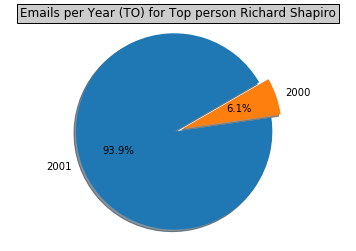

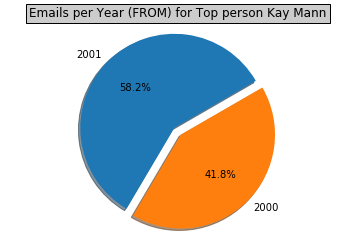

In [54]:
# Checking if data processed folder is exist in directory or not.
if os.path.isdir(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/') == 1:
    if os.path.isdir(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Top Employee/result/') == 0:
        os.makedirs(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Top Employee/result/')

pieFig1 = relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Top Employee/result/'+empList[0]+'.png'
        
fig1, ax1 = plt.subplots()
ax1.pie(sizes1, explode=explode1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Emails per Year (TO) for Top person Richard Shapiro', 
             bbox={'facecolor':'0.8', 'pad':3})
plt.savefig(pieFig1, bbox_inches='tight')
plt.show()



pieFig2 = relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Top Employee/result/'+empList[1]+'.png'
        
fig2, ax2 = plt.subplots()
ax2.pie(sizes2, explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Emails per Year (FROM) for Top person Kay Mann', 
             bbox={'facecolor':'0.8', 'pad':3})
plt.savefig(pieFig2, bbox_inches='tight')
plt.show()

#### Conclusion from Above Analysis & Pictures

- As we know, The company went bankrupt in year 2001. So, it was obvious that the whole email transaction was occur in same year.
- Richard Shapiro, The company Vice President. We can see 94 % of email traffic in year 2001.
- Kay Mann, Legal Head. We can see 50% of email traffic, which shows he was not actual the part of Enron. But he was actively involved.